# IE517 MLF F20
# Module 6 Homework (Cross validation)

Yaxuan Wang (yaxuanw3)

In [20]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from PIL import Image
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv(r"C:\Users\Yaxuan Mandy Wang\Desktop\ccdefault.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
X = df.iloc[:, 1:24].values
y = df['DEFAULT'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

First, I split the data into 10% testing set and the rest 90% into training set. Then, I fit the decision tree classifier with gini as my criterion to our training set, and compute the accuracy score on the testing set by using the fitted model. 

In [19]:
## decision tree
tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
print("The accuracy score for decision tree model fitted on the testing dataset is:", accuracy_score(y_test, y_pred))


The accuracy score for decision tree model fitted on the testing dataset is: 0.8216666666666667


## Part 1: Random Test Train Splits

In this section, I will use the Pipeline to first impute the mission values as the average value of each feature, then normalize our data, eventually fit the decision tree classifier on testing dataset. After that, I will compute the in-sample and out-of-sample accuracy scores for 10 different samples by changing random_state from 1 to 10 in sequence. 

In [36]:
import warnings
warnings.filterwarnings('ignore')

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('scaler', StandardScaler()),
        ('decision_tree', DecisionTreeClassifier())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

In = []
Out = []

for i in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
    pipeline.fit(X_train, y_train)
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)
    
    In.append(accuracy_score(y_train, y_pred_train))
    Out.append(accuracy_score(y_test, y_pred_test))
    
#print('The accuracy score for In-samples for 10 different samples are ')
#print([float('{:.4f}'.format(i)) for i in In])
#print('Mean of In-sample %.4f, standard deviation of %.4f' % (np.mean(In), np.std(In)))

#print('\n The accuracy score for Out-samples for 10 different samples are ')
#print([float('{:.4f}'.format(i)) for i in Out])
#print('Mean of Out-sample %.4f, standard deviation of %.4f' % (np.mean(Out), np.std(Out)))

The below tables shows the individual scores for each random state, and the mean as well as standard deviation on the set of scores. 

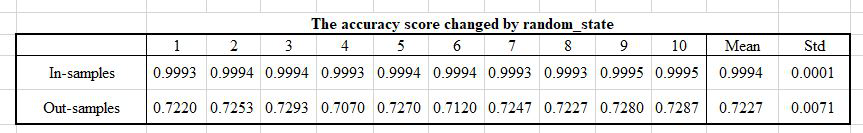

In [34]:
myImage = Image.open("Capture.jpg");
myImage

The below plot clearly shows the variation of accuracy scored changed by random state.

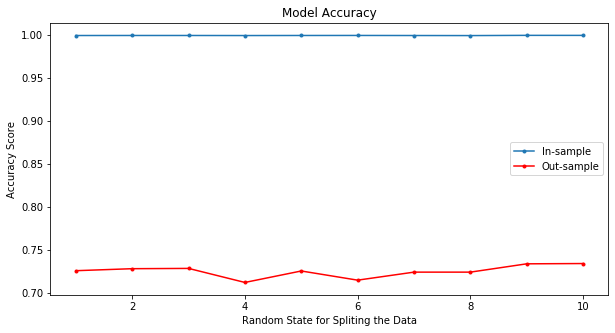

In [39]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11), In, '.-')
plt.plot(range(1,11), Out, 'r.-')
plt.xlabel("Random State for Spliting the Data")
plt.ylabel('Accuracy Score')
plt.legend(('In-sample', 'Out-sample'))
plt.title("Model Accuracy")
_ = plt.show()

## Part 2: Cross Validation

In this section, I use cross_val_scores with k-fold CV (k=10) to fit the decision tree classifier. 

In [49]:
# in-sample
cv_score_in = cross_val_score(DecisionTreeClassifier(), X_train, y_train, cv=10)
#print([float('{:.4f}'.format(i)) for i in cv_score_in])
#print('Mean of %.4f, standard deviation of %.4f' % (np.mean(cv_score_in), np.std(cv_score_in)))

In [50]:
#out-sample
cv_score_out = cross_val_score(DecisionTreeClassifier(), X_test, y_test, cv=10)
#print([float('{:.4f}'.format(i)) for i in cv_score_out])
#print('Mean of %.4f, standard deviation of %.4f' % (np.mean(cv_score_out), np.std(cv_score_out)))

The below tables shows the individual fold accuracy scores, and the mean as well as standard deviation of thefold scores. 

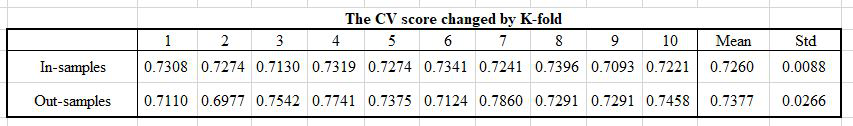

In [48]:
myImage = Image.open("Capture2.jpg");
myImage

The below plot clearly shows the variation of CV accuracy scored changed by number of fold.

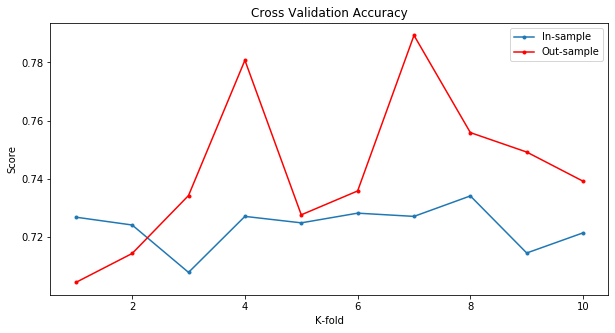

In [52]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11), cv_score_in, '.-')
plt.plot(range(1,11), cv_score_out, 'r.-')
plt.xlabel("K-fold")
plt.ylabel('Score')
plt.legend(('In-sample', 'Out-sample'))
plt.title("Cross Validation Accuracy")
_ = plt.show()

## Part 3: Conclusions

Based on the accuracy score, we can see that in the K-fold cross validation method, there are cases that the CV accuracy score for the out-sample/testing dataset are higher than the one for in-sample/training dataset. However, in the random test train splits method, there are no cases that the accuracy score for out-sample/testing dataset are higher than the one for in-sample/training dataset, which might be an overfititng issue. To best estimate on the unseen data, I suggest to use K-fold cross validation everytime before fitting the model. 

The method of random test train splits is more efficient to run. This is because k-fold cross validation will split the data 10 times to achieve the lower bias, so it requires more times. 

## Part 4: Appendix

Link to github repo:

https://github.com/yaxuanw3/IE517_F20_HW6

In [1]:
print("My name is {Yaxuan Wang}")
print("My NetID is: {662869931}")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is {Yaxuan Wang}
My NetID is: {662869931}
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
